In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1308]:
# read our data from the 'K-12 SSDB (Public).xlsx' spreadsheet
df = pd.read_excel('K-12 SSDB (Public).xlsx')

In [1309]:
# change column header to correct information
df.columns = df.iloc[0]

In [1310]:
# remove the row that is now our column
df = df.drop([0])

In [1311]:
# sort our data by most recent shooting
df = df.sort_index(axis=0, ascending=False)

In [1312]:
# order the index now from 0 on
df = df.reset_index(drop=True)

In [1313]:
# Change timestap to 'YYYY-MM-DD'
df['Date'] = df.Date.map(lambda x: x.strftime('%Y-%m-%d'))

In [1314]:
# Create a column holding just the year of occurence ('YYYY')
df['Year'] = [date[0:4] for date in df['Date']]

In [1315]:
# read our data from the 'Gun_laws.xlsx' spreadsheet
gun_laws_df = pd.read_excel('Gun_laws.xlsx')

In [1316]:
# Set state as index
gun_laws_df = gun_laws_df.set_index('State')

In [1317]:
# convert the columns from strings to integers 
df['Year'] = pd.to_numeric(df['Year'])

In [1318]:
# getting grade based of year and state ---- testing that this works 
gun_laws_df[gun_laws_df.columns[gun_laws_df.columns == 2018]].loc['AL'].values[0]

'F'

In [1319]:
# create a for loop that dynamically gets us each grade based on each year and state
df['Grade'] = np.nan
grades = []
for idx, row in df.iterrows():
    try:
        grade = gun_laws_df[gun_laws_df.columns[gun_laws_df.columns == row['Year']]].loc[row['State']].values[0]
        grades.append(grade)  
        
    except:
        grades.append(np.nan)
        
# create a new column called 'Grade' and insert the corresponding grades into the column
df['Grade'] = grades

In [1320]:
# read our data from the 'population.csv' spreadsheet
population_df = pd.read_csv('population.csv')

In [1321]:
# set'State' column as DataFrame index
population_df = population_df.set_index('State')

In [1322]:
# drop column 'Unnamed: 0'
population_df = population_df.drop(columns=['Unnamed: 0'])

In [1323]:
# change header rows (dates) into ints
population_df.columns = population_df.columns.map(int)

In [1324]:
# getting grade based of year and state ---- testing that this works 
population_df[population_df.columns[population_df.columns == 2018]].loc['AL'].values[0]

'4,887,871'

In [1325]:
# create a for loop that dynamically gets us each population based on each year and state
df['Population'] = np.nan
populations = []
for idx, row in df.iterrows():
    try:
        population = population_df[population_df.columns[population_df.columns == row['Year']]].loc[row['State']].values[0]
        populations.append(population) 
        
    except:
        populations.append(np.nan)

# create a new column called 'Population' and insert the corresponding populations into the column
df['Population'] = populations

In [1326]:
# save file to csv
df.to_csv('complete.csv')

In [1327]:
# replace column name whitespaces with underscores 
df.columns = df.columns.str.replace(' ', '_')

In [1328]:
# replace column name forward slash with underscores 
df.columns = df.columns.str.replace('/', '_')

In [1329]:
# df.isna().sum()

In [1330]:
# dropping columns due to the amount of NaN's
df = df.drop(columns=['Shooter_Ethnicity', 'Shooter_had_an_accomplice_who_did_not_fire_gun_(Y_N)'])

In [1331]:
# strip commas from population 
# df['Population'] = df['Population'].str.replace(',', '')

In [1332]:
# turns the entire DataFra
df = df.apply(pd.to_numeric, errors='ignore')

In [1333]:
# mae a groupby DataFrame with multiIndex('State', 'Year') and add aggregates
df_group = df.groupby(['State', 'Year']).agg({'Date': 'count', 'Grade': 'first', 'Population': 'first', 'Killed_(includes_shooter)': 'sum', 'Wounded': 'sum', 'Total_Injured_Killed_Victims': sum, 'Number_of_Shots_Fired': 'count'})

In [1334]:
# stack gun_laws_df so we can easily join it on the df_group
gun_laws_df = gun_laws_df.stack()

In [1344]:
df_laws = gun_laws_df.to_frame() # use to_frame to convert Series to DataFrame
df_laws = df_laws.rename(columns= {0: 'Grade'}) # rename column from 0 to 'Grade'
df_laws = df_laws.rename_axis(['State', 'Year']) # rename the axis to match df_group ('State', 'Year')

In [1336]:
# stack gun_laws_df so we can easily join it on the df_group
population_df = population_df.stack()

In [1343]:
df_pop = population_df.to_frame() # use to_frame to convert Series to DataFrame
df_pop = df_pop.rename(columns= {0: 'Population'}) # rename column from 0 to 'Population'
df_pop = df_pop.rename_axis(['State', 'Year']) # rename the axis to match df_group ('State', 'Year')

In [1338]:
# concat (merge) all 3 DataFrames into one and fill NaN values to be 0 value
df_final = pd.concat([df_laws, df_pop, df_group], axis=1).fillna(0)

In [1339]:
# remove any duplicated columns
df_final = df_final.loc[:,~df_final.columns.duplicated()]

In [1341]:
# save file to csv
df_final.to_csv('final.csv')

In [3]:
# read our data from the 'Grades.Pop.Incidences.csv' spreadsheet
grades_pop_incidences_df = pd.read_csv('Grades.Pop.Incidences.csv')

In [8]:
grades_pop_incidences_df = grades_pop_incidences_df.drop(columns='Unnamed: 0')

In [13]:
# min population
grades_pop_incidences_df['Population'].min()

576608

In [14]:
# max population 
grades_pop_incidences_df['Population'].max()

39557045

In [66]:
# population amount by quantile
quant_0 = grades_pop_incidences_df['Population'].quantile(.0)
quant_10th= grades_pop_incidences_df['Population'].quantile(.1)
quant_20th= grades_pop_incidences_df['Population'].quantile(.2)
quant_30th= grades_pop_incidences_df['Population'].quantile(.3)
quant_40th= grades_pop_incidences_df['Population'].quantile(.4)
quant_50th= grades_pop_incidences_df['Population'].quantile(.5)
quant_60th= grades_pop_incidences_df['Population'].quantile(.6)
quant_70th= grades_pop_incidences_df['Population'].quantile(.7)
quant_80th= grades_pop_incidences_df['Population'].quantile(.8)
quant_90th= grades_pop_incidences_df['Population'].quantile(.9)
quant_100th= grades_pop_incidences_df['Population'].quantile(1)

In [108]:
# create a new DataFrame with even amount of bins by population with the population count and the sum of incidences between those population ranges
bins = pd.cut(grades_pop_incidences_df['Population'], [quant_0, quant_10th,quant_20th,quant_30th,quant_40th,quant_50th, quant_60th, quant_70th, quant_80th, quant_90th, quant_100th])            
pop_binned_df = grades_pop_incidences_df.groupby(bins).agg({'Population': 'count', 'Incidences': 'sum'})

In [110]:
pop_binned_df

,Population,Incidences
Population,,
"(576608.0, 913404.7]",34,8.0
"(913404.7, 1385509.2]",35,11.0
"(1385509.2, 2555315.4]",35,8.0
"(2555315.4, 3097050.2]",35,16.0
"(3097050.2, 4535541.5]",35,23.0
"(4535541.5, 5705768.4]",35,32.0
"(5705768.4, 6674336.0]",35,30.0
"(6674336.0, 9155575.0]",35,32.0
"(9155575.0, 12802374.4]",35,71.0


Text(0.5, 1.0, 'Incidence by Population Range')

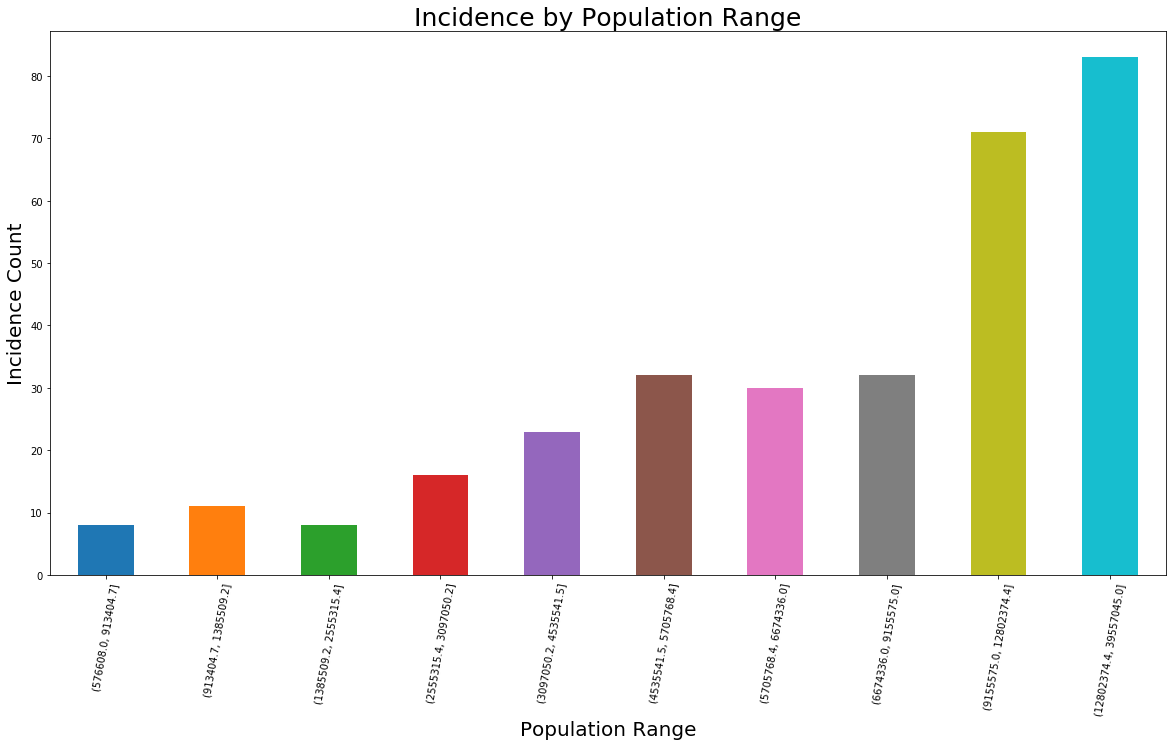

In [109]:
plt.figure(figsize=(20,10))
ax = pop_binned_df['Incidences'].plot.bar(rot=80)
plt.xlabel('Population Range', size=20)
plt.ylabel('Incidence Count', size=20)
plt.title('Incidence by Population Range', size=25)

In [107]:
# what we see from the above is that the larger the population, the more incidence have occured. 